In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load and standardize result files
rf = pd.read_csv("02_complex_baselines/results/rf/10_fold_pseudobulk_30_pcs_tissue_growth.csv")[["DRUG_ID", "r2_global", "pearson_r", "rmse"]]
xgb = pd.read_csv("02_complex_baselines/results/xgboost/10_fold_pseudobulk_30_pcs_tissue_growth.csv")[["DRUG_ID", "r2_global", "pearson_r", "rmse"]]
enet = pd.read_csv("01_simple_baselines/results/elastic_net/10_fold_pseudobulk_30_pcs_tissue_growth.csv")[["DRUG_ID", "r2_global", "pearson_r", "rmse"]]

# Rename columns for clarity
rf = rf.rename(columns={
    "r2_global": "R2_RF",
    "pearson_r": "Pearson_RF",
    "rmse": "RMSE_RF"
})

xgb = xgb.rename(columns={
    "r2_global": "R2_XGB",
    "pearson_r": "Pearson_XGB",
    "rmse": "RMSE_XGB"
})

enet = enet.rename(columns={
    "r2_global": "R2_EN",
    "pearson_r": "Pearson_EN",
    "rmse": "RMSE_EN"
})

# Merge all on DRUG_ID
merged = rf.merge(xgb, on="DRUG_ID").merge(enet, on="DRUG_ID")
print("RF total drugs:", len(rf))
print("XGB total drugs:", len(xgb))
print("EN total drugs:", len(enet))
print("Drugs after merging:", len(merged))

# Show mean performance across drugs
print("📊 Mean Performance per Model:")
for metric in ["R2", "Pearson", "RMSE"]:
    print(f"\n{metric}:")
    print(merged[[f"{metric}_RF", f"{metric}_XGB", f"{metric}_EN"]].mean().sort_values(ascending=False))


RF total drugs: 625
XGB total drugs: 625
EN total drugs: 625
Drugs after merging: 625
📊 Mean Performance per Model:

R2:
R2_EN     0.073231
R2_RF     0.063725
R2_XGB    0.033094
dtype: float64

Pearson:
Pearson_RF     0.259872
Pearson_XGB    0.254045
Pearson_EN     0.224375
dtype: float64

RMSE:
RMSE_XGB    1.209962
RMSE_RF     1.192157
RMSE_EN     1.185784
dtype: float64


/tmp/ipykernel_3185971/3264782338.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


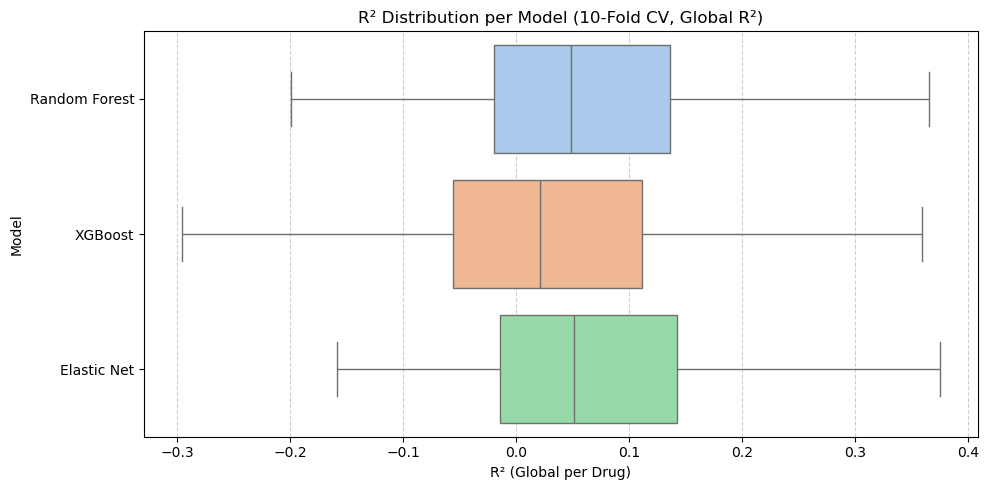

📊 Mean R² per model:
R2_EN     0.073231
R2_RF     0.063725
R2_XGB    0.033094
dtype: float64

📈 Elastic Net vs. RF
Improved drugs: 355
Worsened drugs: 270
Mean ΔR²: 0.0095

📈 Elastic Net vs. XGB
Improved drugs: 434
Worsened drugs: 191
Mean ΔR²: 0.0401

📈 XGB vs. RF
Improved drugs: 151
Worsened drugs: 474
Mean ΔR²: -0.0306


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load and standardize result files
rf = pd.read_csv("02_complex_baselines/results/rf/10_fold_pseudobulk_30_pcs_tissue_growth.csv")[["DRUG_ID", "r2_global", "pearson_r", "rmse"]]
xgb = pd.read_csv("02_complex_baselines/results/xgboost/10_fold_pseudobulk_30_pcs_tissue_growth.csv")[["DRUG_ID", "r2_global", "pearson_r", "rmse"]]
enet = pd.read_csv("01_simple_baselines/results/elastic_net/10_fold_pseudobulk_30_pcs_tissue_growth.csv")[["DRUG_ID", "r2_global", "pearson_r", "rmse"]]

# Rename for clarity
rf = rf.rename(columns={"r2_global": "R2_RF", "pearson_r": "Pearson_RF", "rmse": "RMSE_RF"})
xgb = xgb.rename(columns={"r2_global": "R2_XGB", "pearson_r": "Pearson_XGB", "rmse": "RMSE_XGB"})
enet = enet.rename(columns={"r2_global": "R2_EN", "pearson_r": "Pearson_EN", "rmse": "RMSE_EN"})

# Merge all on DRUG_ID
merged = rf.merge(xgb, on="DRUG_ID").merge(enet, on="DRUG_ID")

# Prepare long-format DataFrame for boxplot
long_r2 = merged[["DRUG_ID", "R2_RF", "R2_XGB", "R2_EN"]].melt(
    id_vars="DRUG_ID",
    value_vars=["R2_RF", "R2_XGB", "R2_EN"],
    var_name="Model",
    value_name="R2"
)

# Rename model names for cleaner labels
long_r2["Model"] = long_r2["Model"].replace({
    "R2_RF": "Random Forest",
    "R2_XGB": "XGBoost",
    "R2_EN": "Elastic Net"
})

# Plot R² distributions
plt.figure(figsize=(10, 5))
sns.boxplot(
    data=long_r2,
    x="R2",
    y="Model",
    palette="pastel",
    showfliers=False
)
plt.title("R² Distribution per Model (10-Fold CV, Global R²)")
plt.xlabel("R² (Global per Drug)")
plt.ylabel("Model")
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Mean R² per model
mean_r2 = merged[["R2_RF", "R2_XGB", "R2_EN"]].mean()
print("📊 Mean R² per model:")
print(mean_r2.sort_values(ascending=False))

# Pairwise ΔR² comparisons
merged["Δ_EN_vs_RF"] = merged["R2_EN"] - merged["R2_RF"]
merged["Δ_EN_vs_XGB"] = merged["R2_EN"] - merged["R2_XGB"]
merged["Δ_XGB_vs_RF"] = merged["R2_XGB"] - merged["R2_RF"]

# Print summary
for label, delta_col in {
    "Elastic Net vs. RF": "Δ_EN_vs_RF",
    "Elastic Net vs. XGB": "Δ_EN_vs_XGB",
    "XGB vs. RF": "Δ_XGB_vs_RF"
}.items():
    print(f"\n📈 {label}")
    print(f"Improved drugs: {(merged[delta_col] > 0).sum()}")
    print(f"Worsened drugs: {(merged[delta_col] < 0).sum()}")
    print(f"Mean ΔR²: {merged[delta_col].mean():.4f}")


In [3]:
from scipy.stats import ttest_rel

# Perform paired t-tests across metrics
for metric in ["R2", "Pearson", "RMSE"]:
    print(f"\n📊 Paired t-tests for {metric}:")

    # Prepare values
    col_en = f"{metric}_EN"
    col_rf = f"{metric}_RF"
    col_xgb = f"{metric}_XGB"

    # Invert RMSE so that higher = better
    if metric == "RMSE":
        merged[col_en] = -merged[col_en]
        merged[col_rf] = -merged[col_rf]
        merged[col_xgb] = -merged[col_xgb]

    # EN vs RF
    t_stat, p_val = ttest_rel(merged[col_en], merged[col_rf])
    print(f"Elastic Net vs. RF: t = {t_stat:.3f}, p = {p_val:.3e}")

    # EN vs XGB
    t_stat, p_val = ttest_rel(merged[col_en], merged[col_xgb])
    print(f"Elastic Net vs. XGBoost: t = {t_stat:.3f}, p = {p_val:.3e}")

    # XGB vs RF
    t_stat, p_val = ttest_rel(merged[col_xgb], merged[col_rf])
    print(f"XGBoost vs. RF: t = {t_stat:.3f}, p = {p_val:.3e}")



📊 Paired t-tests for R2:
Elastic Net vs. RF: t = 3.936, p = 9.227e-05
Elastic Net vs. XGBoost: t = 13.485, p = 1.484e-36
XGBoost vs. RF: t = -17.747, p = 2.364e-57

📊 Paired t-tests for Pearson:
Elastic Net vs. RF: t = -7.960, p = 8.173e-15
Elastic Net vs. XGBoost: t = -6.291, p = 5.950e-10
XGBoost vs. RF: t = -3.185, p = 1.520e-03

📊 Paired t-tests for RMSE:
Elastic Net vs. RF: t = 3.978, p = 7.755e-05
Elastic Net vs. XGBoost: t = 12.642, p = 8.900e-33
XGBoost vs. RF: t = -16.043, p = 9.511e-49


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load and standardize result files
rf = pd.read_csv("02_complex_baselines/results/rf/scgpt_10_fold_embeddings_30_pcs_tissue_growth.csv")[["DRUG_ID", "r2_global", "pearson_r", "rmse"]]
xgb = pd.read_csv("02_complex_baselines/results/xgboost/scgpt_10_fold_embeddings_30_pcs_tissue_growth.csv")[["DRUG_ID", "r2_global", "pearson_r", "rmse"]]
enet = pd.read_csv("01_simple_baselines/results/elastic_net/scgpt_10_fold_embeddings_30_pcs_tissue_growth.csv")[["DRUG_ID", "r2_global", "pearson_r", "rmse"]]

# Rename columns for clarity
rf = rf.rename(columns={
    "r2_global": "R2_RF",
    "pearson_r": "Pearson_RF",
    "rmse": "RMSE_RF"
})

xgb = xgb.rename(columns={
    "r2_global": "R2_XGB",
    "pearson_r": "Pearson_XGB",
    "rmse": "RMSE_XGB"
})

enet = enet.rename(columns={
    "r2_global": "R2_EN",
    "pearson_r": "Pearson_EN",
    "rmse": "RMSE_EN"
})

# Merge all on DRUG_ID
merged = rf.merge(xgb, on="DRUG_ID").merge(enet, on="DRUG_ID")
print("RF total drugs:", len(rf))
print("XGB total drugs:", len(xgb))
print("EN total drugs:", len(enet))
print("Drugs after merging:", len(merged))

# Show mean performance across drugs
print("📊 Mean Performance per Model:")
for metric in ["R2", "Pearson", "RMSE"]:
    print(f"\n{metric}:")
    print(merged[[f"{metric}_RF", f"{metric}_XGB", f"{metric}_EN"]].mean().sort_values(ascending=False))


RF total drugs: 625
XGB total drugs: 625
EN total drugs: 625
Drugs after merging: 625
📊 Mean Performance per Model:

R2:
R2_EN     0.066216
R2_RF     0.043290
R2_XGB    0.005970
dtype: float64

Pearson:
Pearson_RF     0.242418
Pearson_XGB    0.237023
Pearson_EN     0.213594
dtype: float64

RMSE:
RMSE_XGB    1.228125
RMSE_RF     1.205216
RMSE_EN     1.189306
dtype: float64


/tmp/ipykernel_3185971/4196176147.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


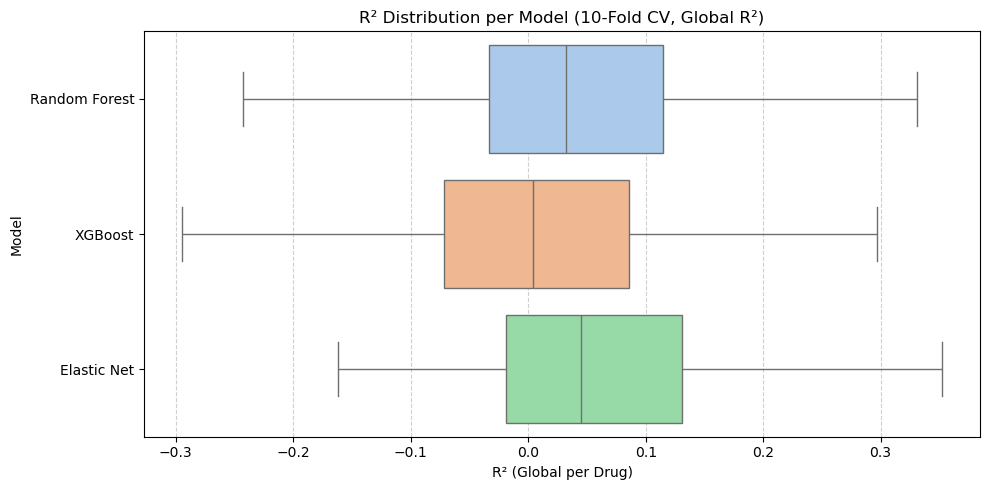

📊 Mean R² per model:
R2_EN     0.066216
R2_RF     0.043290
R2_XGB    0.005970
dtype: float64

📈 Elastic Net vs. RF
Improved drugs: 405
Worsened drugs: 220
Mean ΔR²: 0.0229

📈 Elastic Net vs. XGB
Improved drugs: 474
Worsened drugs: 151
Mean ΔR²: 0.0602

📈 XGB vs. RF
Improved drugs: 122
Worsened drugs: 503
Mean ΔR²: -0.0373


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load and standardize result files
rf = pd.read_csv("02_complex_baselines/results/rf/scgpt_10_fold_embeddings_30_pcs_tissue_growth.csv")[["DRUG_ID", "r2_global", "pearson_r", "rmse"]]
xgb = pd.read_csv("02_complex_baselines/results/xgboost/scgpt_10_fold_embeddings_30_pcs_tissue_growth.csv")[["DRUG_ID", "r2_global", "pearson_r", "rmse"]]
enet = pd.read_csv("01_simple_baselines/results/elastic_net/scgpt_10_fold_embeddings_30_pcs_tissue_growth.csv")[["DRUG_ID", "r2_global", "pearson_r", "rmse"]]

# Rename for clarity
rf = rf.rename(columns={"r2_global": "R2_RF", "pearson_r": "Pearson_RF", "rmse": "RMSE_RF"})
xgb = xgb.rename(columns={"r2_global": "R2_XGB", "pearson_r": "Pearson_XGB", "rmse": "RMSE_XGB"})
enet = enet.rename(columns={"r2_global": "R2_EN", "pearson_r": "Pearson_EN", "rmse": "RMSE_EN"})

# Merge all on DRUG_ID
merged = rf.merge(xgb, on="DRUG_ID").merge(enet, on="DRUG_ID")

# Prepare long-format DataFrame for boxplot
long_r2 = merged[["DRUG_ID", "R2_RF", "R2_XGB", "R2_EN"]].melt(
    id_vars="DRUG_ID",
    value_vars=["R2_RF", "R2_XGB", "R2_EN"],
    var_name="Model",
    value_name="R2"
)

# Rename model names for cleaner labels
long_r2["Model"] = long_r2["Model"].replace({
    "R2_RF": "Random Forest",
    "R2_XGB": "XGBoost",
    "R2_EN": "Elastic Net"
})

# Plot R² distributions
plt.figure(figsize=(10, 5))
sns.boxplot(
    data=long_r2,
    x="R2",
    y="Model",
    palette="pastel",
    showfliers=False
)
plt.title("R² Distribution per Model (10-Fold CV, Global R²)")
plt.xlabel("R² (Global per Drug)")
plt.ylabel("Model")
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Mean R² per model
mean_r2 = merged[["R2_RF", "R2_XGB", "R2_EN"]].mean()
print("📊 Mean R² per model:")
print(mean_r2.sort_values(ascending=False))

# Pairwise ΔR² comparisons
merged["Δ_EN_vs_RF"] = merged["R2_EN"] - merged["R2_RF"]
merged["Δ_EN_vs_XGB"] = merged["R2_EN"] - merged["R2_XGB"]
merged["Δ_XGB_vs_RF"] = merged["R2_XGB"] - merged["R2_RF"]

# Print summary
for label, delta_col in {
    "Elastic Net vs. RF": "Δ_EN_vs_RF",
    "Elastic Net vs. XGB": "Δ_EN_vs_XGB",
    "XGB vs. RF": "Δ_XGB_vs_RF"
}.items():
    print(f"\n📈 {label}")
    print(f"Improved drugs: {(merged[delta_col] > 0).sum()}")
    print(f"Worsened drugs: {(merged[delta_col] < 0).sum()}")
    print(f"Mean ΔR²: {merged[delta_col].mean():.4f}")


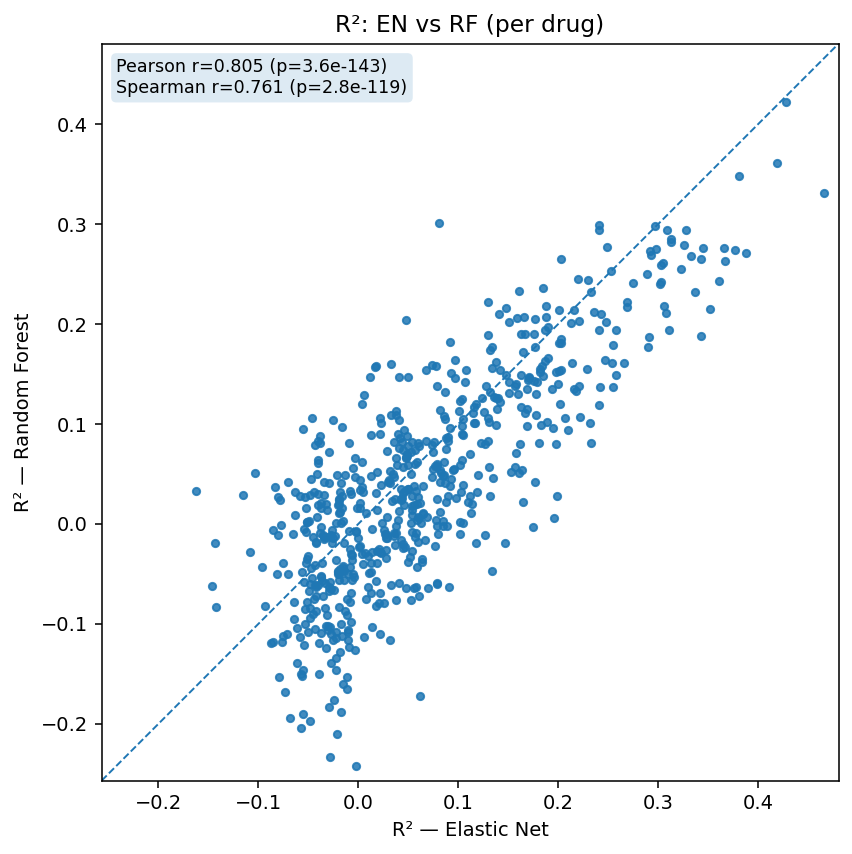

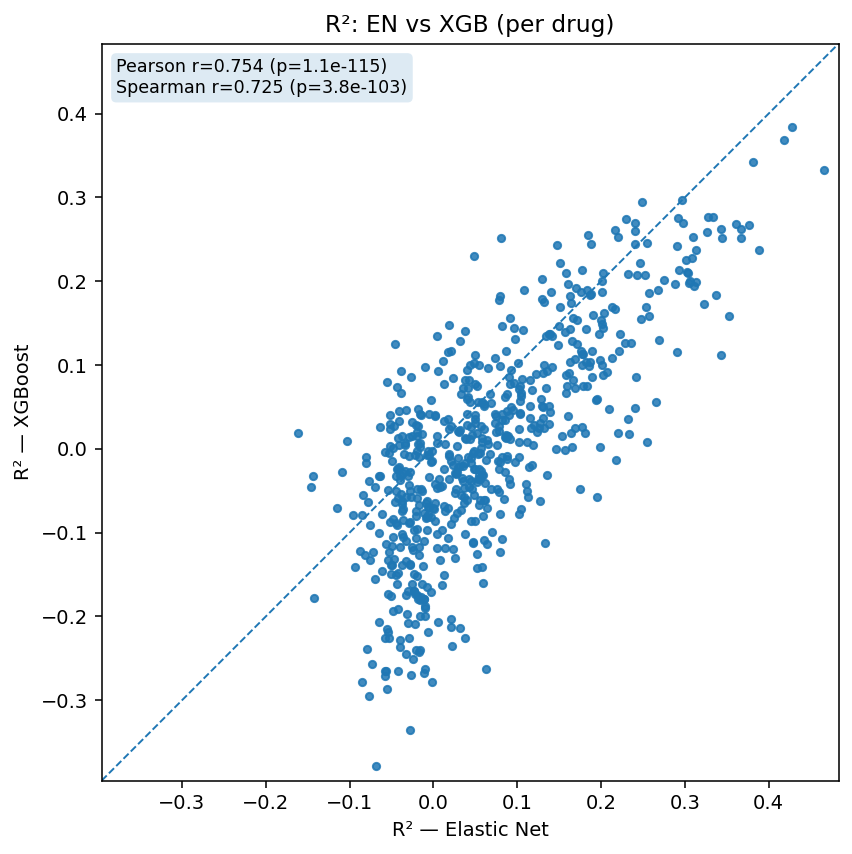

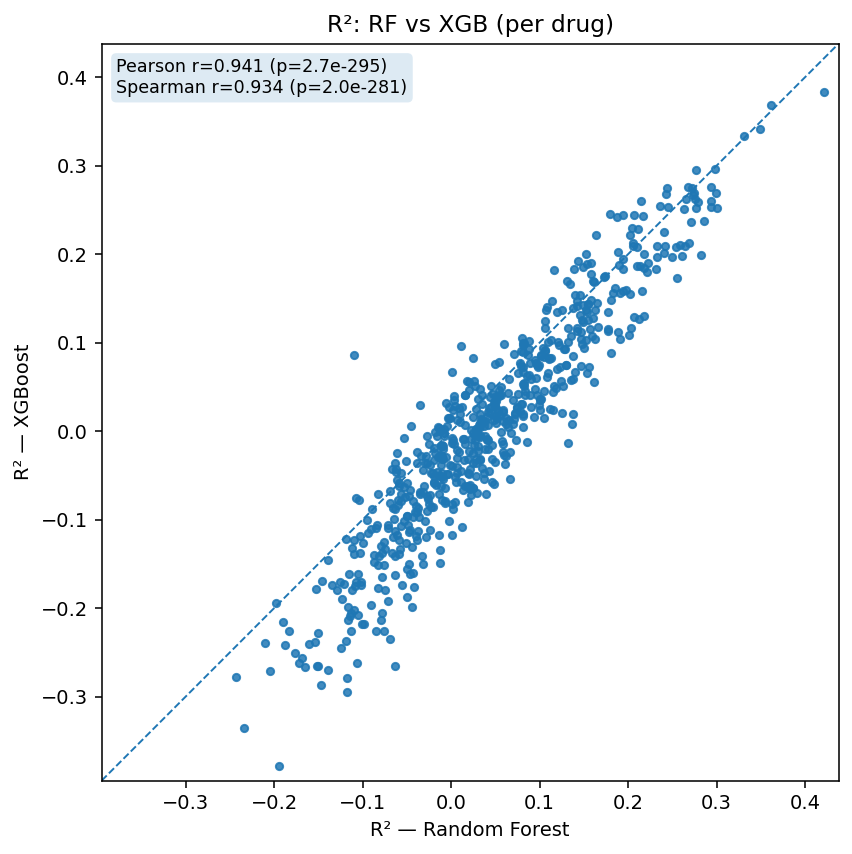

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr

def plot_r2_vs_r2(df, col_x, col_y, label_x, label_y, drug_col="DRUG_ID",
                  annotate_top=12, title=None):
    """
    Scatter of per-drug R² with a 45° parity line and Pearson/Spearman stats.
    NOTE: 'annotate_top' is kept for backward compatibility but is ignored.
    """
    # Pull data
    x = df[col_x].to_numpy()
    y = df[col_y].to_numpy()

    # Figure
    fig, ax = plt.subplots(figsize=(6.2,6.2), dpi=140)
    ax.scatter(x, y, s=14, alpha=0.85)

    # Parity line
    mn = np.nanmin([np.nanmin(x), np.nanmin(y)])
    mx = np.nanmax([np.nanmax(x), np.nanmax(y)])
    pad = 0.02 * (mx - mn if mx > mn else 1.0)
    ax.plot([mn - pad, mx + pad], [mn - pad, mx + pad], ls="--", lw=1)

    # Correlations box
    pr, pp = pearsonr(x, y)
    sr, sp = spearmanr(x, y)
    txt = f"Pearson r={pr:.3f} (p={pp:.1e})\nSpearman r={sr:.3f} (p={sp:.1e})"
    ax.text(0.02, 0.98, txt, transform=ax.transAxes, va="top", ha="left",
            fontsize=9, bbox=dict(boxstyle="round", alpha=0.15, ec="none"))

    # Axes, title, aspect
    ax.set_xlabel(f"R² — {label_x}")
    ax.set_ylabel(f"R² — {label_y}")
    ax.set_title(title or f"Per-drug R²: {label_x} vs {label_y}")
    ax.set_xlim(mn - pad, mx + pad)
    ax.set_ylim(mn - pad, mx + pad)
    ax.set_aspect("equal", adjustable="box")
    plt.tight_layout()
    plt.show()

# Calls for the three pairs present in `merged`
plot_r2_vs_r2(merged, "R2_EN",  "R2_RF",  "Elastic Net", "Random Forest",
              annotate_top=12, title="R²: EN vs RF (per drug)")

plot_r2_vs_r2(merged, "R2_EN",  "R2_XGB", "Elastic Net", "XGBoost",
              annotate_top=12, title="R²: EN vs XGB (per drug)")

plot_r2_vs_r2(merged, "R2_RF",  "R2_XGB", "Random Forest", "XGBoost",
              annotate_top=12, title="R²: RF vs XGB (per drug)")


In [7]:
from scipy.stats import ttest_rel

# Perform paired t-tests across metrics
for metric in ["R2", "Pearson", "RMSE"]:
    print(f"\n📊 Paired t-tests for {metric}:")

    # Prepare values
    col_en = f"{metric}_EN"
    col_rf = f"{metric}_RF"
    col_xgb = f"{metric}_XGB"

    # Invert RMSE so that higher = better
    if metric == "RMSE":
        merged[col_en] = -merged[col_en]
        merged[col_rf] = -merged[col_rf]
        merged[col_xgb] = -merged[col_xgb]

    # EN vs RF
    t_stat, p_val = ttest_rel(merged[col_en], merged[col_rf])
    print(f"Elastic Net vs. RF: t = {t_stat:.3f}, p = {p_val:.3e}")

    # EN vs XGB
    t_stat, p_val = ttest_rel(merged[col_en], merged[col_xgb])
    print(f"Elastic Net vs. XGBoost: t = {t_stat:.3f}, p = {p_val:.3e}")

    # XGB vs RF
    t_stat, p_val = ttest_rel(merged[col_xgb], merged[col_rf])
    print(f"XGBoost vs. RF: t = {t_stat:.3f}, p = {p_val:.3e}")



📊 Paired t-tests for R2:
Elastic Net vs. RF: t = 8.368, p = 3.856e-16
Elastic Net vs. XGBoost: t = 17.679, p = 5.245e-57
XGBoost vs. RF: t = -20.879, p = 8.037e-74

📊 Paired t-tests for Pearson:
Elastic Net vs. RF: t = -6.194, p = 1.065e-09
Elastic Net vs. XGBoost: t = -4.686, p = 3.426e-06
XGBoost vs. RF: t = -2.947, p = 3.325e-03

📊 Paired t-tests for RMSE:
Elastic Net vs. RF: t = 8.777, p = 1.601e-17
Elastic Net vs. XGBoost: t = 17.173, p = 2.016e-54
XGBoost vs. RF: t = -19.583, p = 6.312e-67
